In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import scipy.stats as stats

In [3]:
df_md_chrg_inpat_sum=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')
df_md_chrg_outpat_sum=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')
df_md_prov_chrg_inpat=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
df_md_prov_chrg_outpat=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')
df_pat_hist=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Patient_history_samp.csv')
df_pat_hist_rev=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Review_patient_history_samp.csv')
df_trx_rev=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Review_transaction_coo.csv')
df_trx=pd.read_csv('F:/analytix_labs/9. End to End Foundation Case Study-1/Transaction_coo.csv')

### Part 1 : Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

### Part 1A: Highest cost variation.

In [4]:
df_md_prov_chrg_inpat.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


In [5]:
df_md_prov_chrg_outpat.head()

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


In [6]:
df_md_chrg_inpat_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
DRG Definition               100 non-null object
Total Discharges             100 non-null int64
Average Covered Charges      100 non-null float64
Average Total Payments       100 non-null float64
Average Medicare Payments    100 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [7]:
df_md_chrg_outpat_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
APC                                    30 non-null object
Outpatient Services                    30 non-null int64
Average Estimated Submitted Charges    30 non-null float64
Average Total Payments                 30 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
df_md_chrg_inpat_sum.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [9]:
df_md_chrg_inpat_sum_new = df_md_chrg_inpat_sum.drop(columns='Average Covered Charges')

In [10]:
df_md_chrg_inpat_sum_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
DRG Definition               100 non-null object
Total Discharges             100 non-null int64
Average Total Payments       100 non-null float64
Average Medicare Payments    100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [11]:
df_md_chrg_outpat_sum.head()

,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


In [13]:
df_md_chrg_outpat_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
APC                                    30 non-null object
Outpatient Services                    30 non-null int64
Average Estimated Submitted Charges    30 non-null float64
Average Total Payments                 30 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
df_md_chrg_inpat_sum_new.rename(columns = {'DRG Definition':'procedure','Total Discharges':'patients_service',
                                           'Average Total Payments':'avg_claims','Average Medicare Payments':'avg_reimbursement'},inplace = True)

In [15]:
df_md_chrg_outpat_sum.rename(columns = {'APC':'procedure','Outpatient Services':'patients_service',
                                           'Average Estimated Submitted Charges':'avg_claims','Average Total Payments':'avg_reimbursement'},inplace = True)

In [16]:
df_md_chrg_sum =pd.concat([df_md_chrg_inpat_sum_new,df_md_chrg_outpat_sum],axis=0)

In [17]:
df_md_chrg_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 29
Data columns (total 4 columns):
procedure            130 non-null object
patients_service     130 non-null int64
avg_claims           130 non-null float64
avg_reimbursement    130 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.1+ KB


In [18]:
df_md_chrg_sum.head()

,procedure,patients_service,avg_claims,avg_reimbursement
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,5762.881821,4508.202659


In [19]:
df_md_prov_chrg_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [20]:
df_md_prov_chrg_inpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [21]:
df_md_prov_chrg_inpat_new=df_md_prov_chrg_inpat.drop(columns = ['Average Covered Charges'])

In [22]:
df_md_prov_chrg_inpat_new.rename(columns = {'DRG Definition':'procedure','Total Discharges':'patients_service',
                                           'Average Total Payments':'avg_claims','Average Medicare Payments':'avg_reimbursement'},inplace = True)

In [23]:
df_md_prov_chrg_inpat_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
procedure                                     163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
patients_service                              163065 non-null int64
avg_claims                                    163065 non-null float64
avg_reimbursement                             163065 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 13.7+ MB


In [24]:
df_md_prov_chrg_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [25]:
df_md_prov_chrg_outpat.rename(columns = {'APC':'procedure','Outpatient Services':'patients_service',
                                           'Average  Estimated Submitted Charges':'avg_claims','Average Total Payments':'avg_reimbursement'},inplace = True)

In [26]:
df_md_prov_chrg_outpat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
procedure                                     43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
patients_service                              43372 non-null int64
avg_claims                                    43372 non-null float64
avg_reimbursement                             43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [27]:
df_md_prov_chrg=pd.concat([df_md_prov_chrg_inpat_new,df_md_prov_chrg_outpat])

In [28]:
df_md_prov_chrg['avg_paid']=df_md_prov_chrg.avg_claims-df_md_prov_chrg.avg_reimbursement

In [29]:
df_md_prov_chrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 12 columns):
procedure                                     206437 non-null object
Provider Id                                   206437 non-null int64
Provider Name                                 206437 non-null object
Provider Street Address                       206437 non-null object
Provider City                                 206437 non-null object
Provider State                                206437 non-null object
Provider Zip Code                             206437 non-null int64
Hospital Referral Region (HRR) Description    206437 non-null object
patients_service                              206437 non-null int64
avg_claims                                    206437 non-null float64
avg_reimbursement                             206437 non-null float64
avg_paid                                      206437 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 20.5+ MB

In [30]:
df_md_prov_chrg_cont=df_md_prov_chrg.loc[:,df_md_prov_chrg.columns.difference(['procedure','Provider State','Provider City','Hospital Referral Region (HRR) Description','Provider Id','Provider Name','Provider Street Address','Provider Zip Code'])]

In [31]:
df_md_prov_chrg_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 4 columns):
avg_claims           206437 non-null float64
avg_paid             206437 non-null float64
avg_reimbursement    206437 non-null float64
patients_service     206437 non-null int64
dtypes: float64(3), int64(1)
memory usage: 7.9 MB


In [32]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [33]:
df_md_prov_chrg_cont.apply(continuous_var_summary)

,avg_claims,avg_paid,avg_reimbursement,patients_service
N,2.064370e+05,2.064370e+05,2.064370e+05,2.064370e+05
NMISS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SUM,1.646880e+09,2.502131e+08,1.396667e+09,3.247723e+07
MEAN,7.977639e+03,1.212055e+03,6.765584e+03,1.573227e+02
MEDIAN,6.154913e+03,9.175000e+02,5.064667e+03,3.200000e+01
STD,7.639621e+03,1.268829e+03,7.311338e+03,1.520598e+03
VAR,5.836381e+07,1.609927e+06,5.345567e+07,2.312218e+06
MIN,1.264375e+01,0.000000e+00,7.305000e+00,1.100000e+01
P1,1.132456e+02,4.188983e+01,4.984186e+01,1.100000e+01
P5,2.720672e+02,1.817642e+02,7.214817e+01,1.200000e+01


In [34]:
df_md_prov_chrg_summ=df_md_prov_chrg.pivot_table(values=['avg_claims','avg_reimbursement','avg_paid'], index=['procedure'], aggfunc=['mean','var']).reset_index()

In [35]:
df_md_prov_chrg_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
(procedure, )                130 non-null object
(mean, avg_claims)           130 non-null float64
(mean, avg_paid)             130 non-null float64
(mean, avg_reimbursement)    130 non-null float64
(var, avg_claims)            130 non-null float64
(var, avg_paid)              130 non-null float64
(var, avg_reimbursement)     130 non-null float64
dtypes: float64(6), object(1)
memory usage: 7.2+ KB


In [36]:
df_md_chrg_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 29
Data columns (total 4 columns):
procedure            130 non-null object
patients_service     130 non-null int64
avg_claims           130 non-null float64
avg_reimbursement    130 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.1+ KB


In [37]:
df_md_prov_chrg_summ=pd.DataFrame(data=df_md_prov_chrg_summ.values,columns=['procedure','avg_claims','avg_paid','avg_reimbursement','var_claims','var_paid','var_reimbursement'])

In [38]:
df_md_prov_chrg_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
procedure            130 non-null object
avg_claims           130 non-null object
avg_paid             130 non-null object
avg_reimbursement    130 non-null object
var_claims           130 non-null object
var_paid             130 non-null object
var_reimbursement    130 non-null object
dtypes: object(7)
memory usage: 7.2+ KB


In [39]:
df_md_prov_chrg_new= pd.merge(df_md_prov_chrg_summ,df_md_chrg_sum, how = 'right', left_on = 'procedure', right_on = 'procedure',suffixes=('_prov', '_sum'))

In [40]:
df_md_prov_chrg_new['claim_anomaly']=df_md_prov_chrg_new.avg_claims_prov-df_md_prov_chrg_new.avg_claims_sum

In [41]:
df_md_prov_chrg_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 11 columns):
procedure                 130 non-null object
avg_claims_prov           130 non-null object
avg_paid                  130 non-null object
avg_reimbursement_prov    130 non-null object
var_claims                130 non-null object
var_paid                  130 non-null object
var_reimbursement         130 non-null object
patients_service          130 non-null int64
avg_claims_sum            130 non-null float64
avg_reimbursement_sum     130 non-null float64
claim_anomaly             130 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ KB


In [42]:
df_md_prov_chrg_new.head()

,procedure,avg_claims_prov,avg_paid,avg_reimbursement_prov,var_claims,var_paid,var_reimbursement,patients_service,avg_claims_sum,avg_reimbursement_sum,claim_anomaly
0,0012 - Level I Debridement & Destruction,91.0844,73.3025,17.7818,9148.26,9017.58,20.6168,275987,74.202956,16.147079,16.8814
1,0013 - Level II Debridement & Destruction,262.558,206.415,56.1424,65529.6,65750.6,70.1686,434706,196.170070,56.133853,66.3876
2,0015 - Level III Debridement & Destruction,362.122,264.148,97.9743,57940.7,57322.3,115.471,509576,326.503444,97.156250,35.6185
3,0019 - Level I Excision/ Biopsy,2264.43,1932.68,331.748,7.75629e+06,7.73382e+06,1254.19,27860,2013.181972,330.908369,251.244
4,0020 - Level II Excision/ Biopsy,3430.85,2862.1,568.756,6.37127e+06,6.32991e+06,3716.47,40642,3161.457873,567.156154,269.397


In [43]:
df_md_prov_chrg_new['cov_paid']=df_md_prov_chrg_new.var_paid/df_md_prov_chrg_new.avg_paid

In [44]:
df_md_prov_chrg_cont_new = df_md_prov_chrg_new.drop(columns = 'procedure')

In [45]:
def box_plot(x):
    plt.figure(figsize=(10,10))
    plt.boxplot(x)
    plt.show()

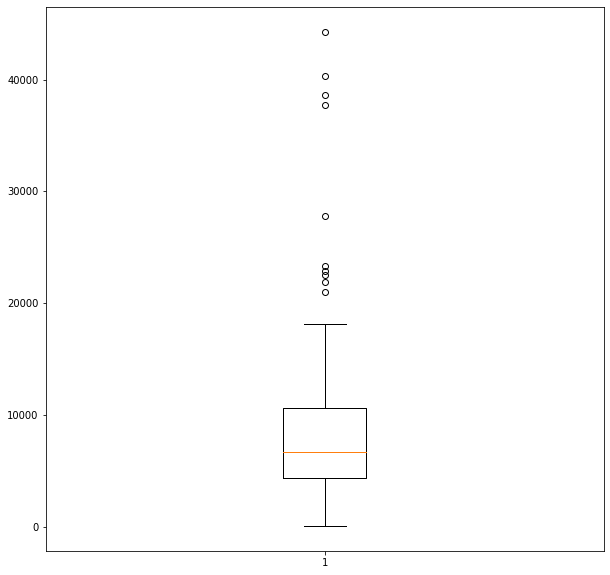

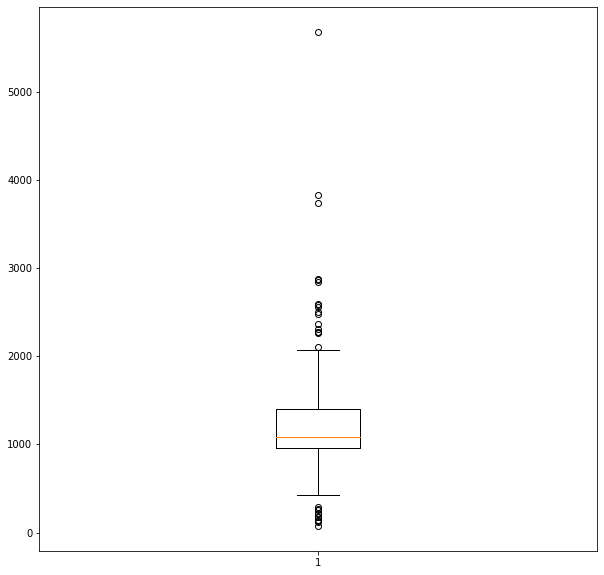

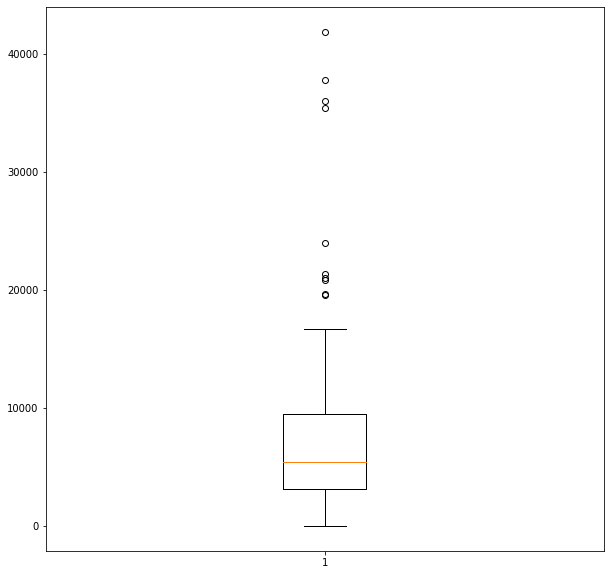

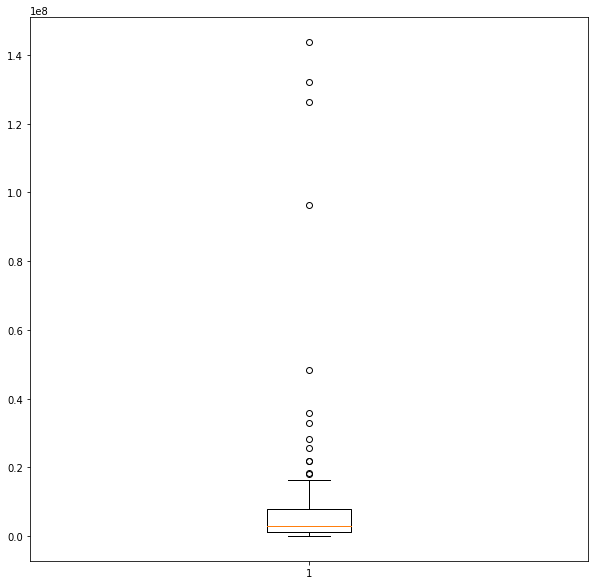

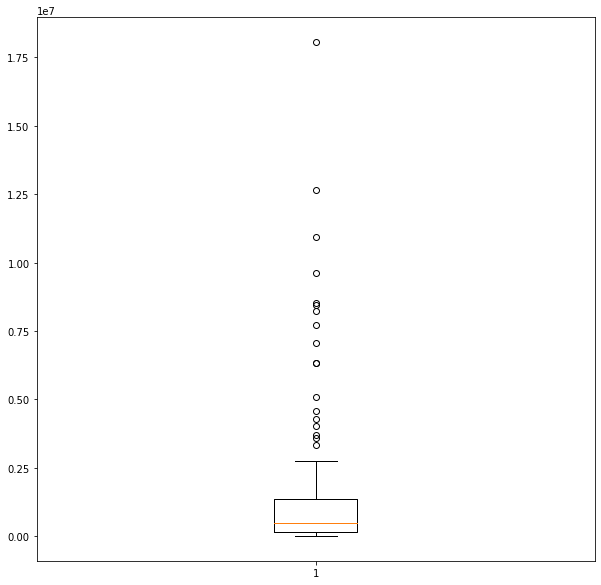

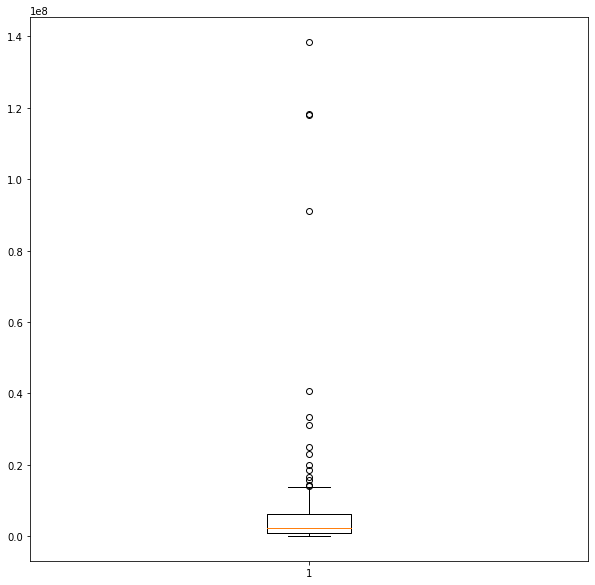

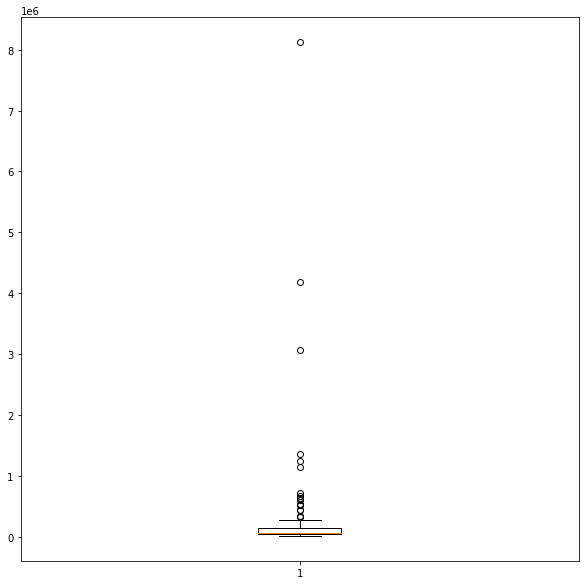

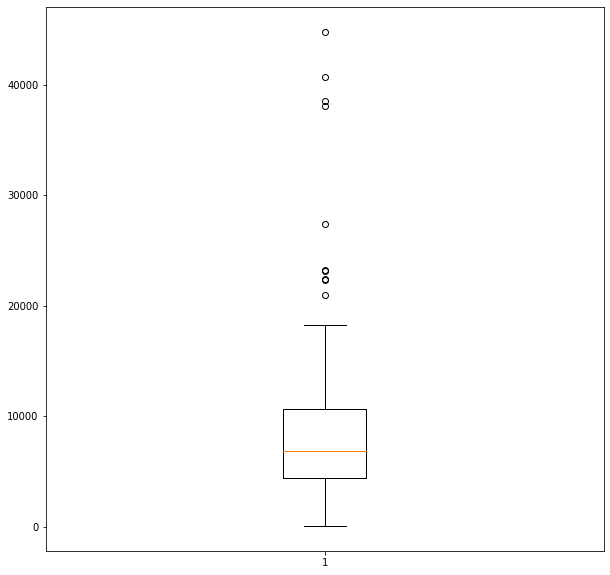

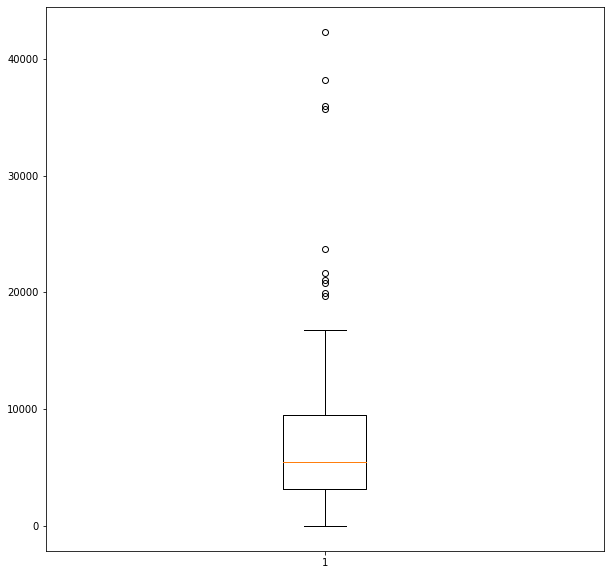

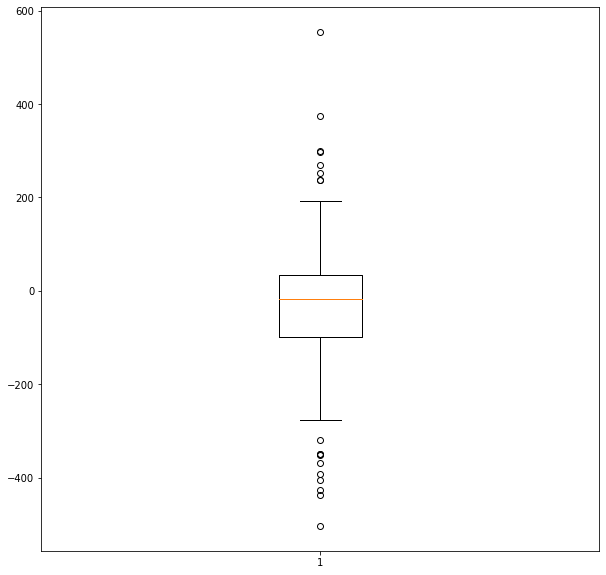

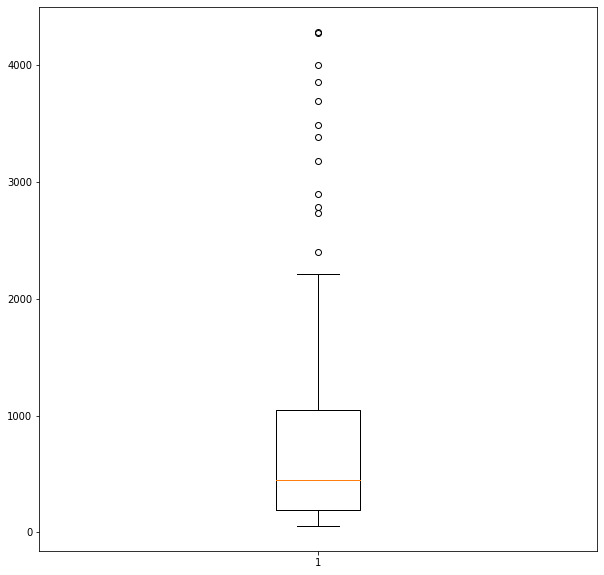

avg_claims_prov           None
avg_paid                  None
avg_reimbursement_prov    None
var_claims                None
var_paid                  None
var_reimbursement         None
patients_service          None
avg_claims_sum            None
avg_reimbursement_sum     None
claim_anomaly             None
cov_paid                  None
dtype: object

In [46]:
df_md_prov_chrg_cont_new.apply(box_plot)

In [47]:
df_md_prov_chrg_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 12 columns):
procedure                 130 non-null object
avg_claims_prov           130 non-null object
avg_paid                  130 non-null object
avg_reimbursement_prov    130 non-null object
var_claims                130 non-null object
var_paid                  130 non-null object
var_reimbursement         130 non-null object
patients_service          130 non-null int64
avg_claims_sum            130 non-null float64
avg_reimbursement_sum     130 non-null float64
claim_anomaly             130 non-null object
cov_paid                  130 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 13.2+ KB


### Highest Cost of Variation among Procedures

In [48]:
df_md_prov_chrg_new.loc[df_md_prov_chrg_new['cov_paid']==df_md_prov_chrg_new['cov_paid'].max()]

,procedure,avg_claims_prov,avg_paid,avg_reimbursement_prov,var_claims,var_paid,var_reimbursement,patients_service,avg_claims_sum,avg_reimbursement_sum,claim_anomaly,cov_paid
58,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,12593.5,1972.05,10621.5,1.2724e+07,8.45032e+06,6.10737e+06,35760,12557.68079,10711.88118,35.8338,4285.03


In [49]:
df_md_prov_chrg_new.loc[df_md_prov_chrg_new['var_claims']==df_md_prov_chrg_new['var_claims'].max()]

,procedure,avg_claims_prov,avg_paid,avg_reimbursement_prov,var_claims,var_paid,var_reimbursement,patients_service,avg_claims_sum,avg_reimbursement_sum,claim_anomaly,cov_paid
122,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,44259.5,2360.05,41899.4,1.43787e+08,8.23169e+06,1.38458e+08,29215,44763.50553,42281.2929,-504.016,3487.93


In [50]:
df_md_prov_chrg_new.loc[df_md_prov_chrg_new['claim_anomaly']==df_md_prov_chrg_new['claim_anomaly'].max()]

,procedure,avg_claims_prov,avg_paid,avg_reimbursement_prov,var_claims,var_paid,var_reimbursement,patients_service,avg_claims_sum,avg_reimbursement_sum,claim_anomaly,cov_paid
10,0204 - Level I Nerve Injections,1279.78,1102.33,177.453,1.17905e+06,1.17636e+06,343.702,278325,725.316346,177.582565,554.469,1067.16


### Part 1B: Highest -Cost Claims by Provider

In [51]:
df_md_prov_chrg=pd.merge(df_md_prov_chrg,df_md_chrg_sum, how = 'left', left_on = 'procedure', right_on = 'procedure',suffixes=('_prov', '_sum'))

In [52]:
df_md_prov_chrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 206436
Data columns (total 15 columns):
procedure                                     206437 non-null object
Provider Id                                   206437 non-null int64
Provider Name                                 206437 non-null object
Provider Street Address                       206437 non-null object
Provider City                                 206437 non-null object
Provider State                                206437 non-null object
Provider Zip Code                             206437 non-null int64
Hospital Referral Region (HRR) Description    206437 non-null object
patients_service_prov                         206437 non-null int64
avg_claims_prov                               206437 non-null float64
avg_reimbursement_prov                        206437 non-null float64
avg_paid                                      206437 non-null float64
patients_service_sum                          206437 non-null

In [61]:
## claim anomaly is calculated using the difference between the avg claims made by any providers on any 
## particular procedure - the avg claim of that procedure obtained from the procedure summmary
df_md_prov_chrg['claim_anomaly']=df_md_prov_chrg['avg_claims_prov']-df_md_prov_chrg['avg_claims_sum']

In [62]:
df_md_prov_chrg['claim_anomaly'].max()

117684.29061

In [63]:
df_md_prov_chrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 206436
Data columns (total 16 columns):
procedure                                     206437 non-null object
Provider Id                                   206437 non-null int64
Provider Name                                 206437 non-null object
Provider Street Address                       206437 non-null object
Provider City                                 206437 non-null object
Provider State                                206437 non-null object
Provider Zip Code                             206437 non-null int64
Hospital Referral Region (HRR) Description    206437 non-null object
patients_service_prov                         206437 non-null int64
avg_claims_prov                               206437 non-null float64
avg_reimbursement_prov                        206437 non-null float64
avg_paid                                      206437 non-null float64
patients_service_sum                          206437 non-null

In [64]:
df_md_prov_chrg.loc[df_md_prov_chrg['claim_anomaly']==df_md_prov_chrg['claim_anomaly'].max()]

,procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,patients_service_prov,avg_claims_prov,avg_reimbursement_prov,avg_paid,patients_service_sum,avg_claims_sum,avg_reimbursement_sum,claim_anomaly
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,156158.1818,154620.8182,1537.3636,33407,38473.89119,35916.06388,117684.29061


In [65]:
df_md_prov_chrg_provider=df_md_prov_chrg.pivot_table(values=['claim_anomaly'], index=['Provider Name'], aggfunc=['sum'])

In [66]:
df_md_prov_chrg_provider.loc[df_md_prov_chrg_provider[('sum', 'claim_anomaly')]== df_md_prov_chrg_provider[('sum', 'claim_anomaly')].max()]

,sum
,claim_anomaly
Provider Name,
"JOHNS HOPKINS HOSPITAL, THE",1.189379e+06


<Figure size 1440x720 with 0 Axes>

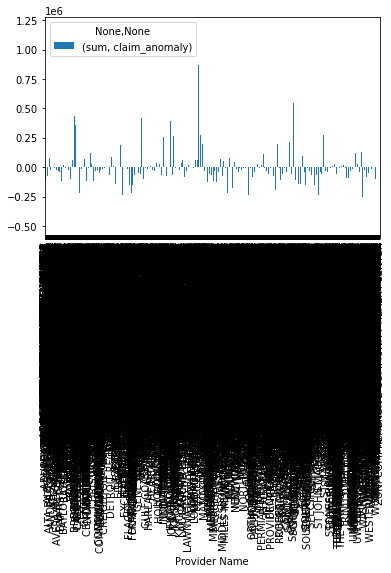

In [67]:
plt.figure(figsize =(20,10))
df_md_prov_chrg_provider.plot(kind ='bar')
plt.show()

### Part 1C: Highest -Cost Claims by Region

In [68]:
df_md_prov_chrg_reg=df_md_prov_chrg.pivot_table(values=['claim_anomaly'], index=['Provider State'], aggfunc=['sum'])

In [69]:
df_md_prov_chrg_reg.loc[df_md_prov_chrg_reg[('sum', 'claim_anomaly')]== df_md_prov_chrg_reg[('sum', 'claim_anomaly')].max()]

,sum
,claim_anomaly
Provider State,
CA,3.411177e+07


<Figure size 1440x720 with 0 Axes>

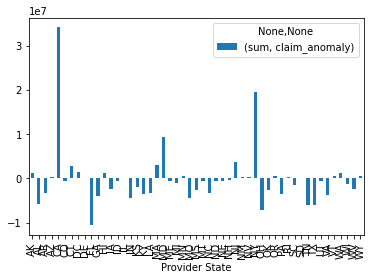

In [70]:
plt.figure(figsize =(20,10))
df_md_prov_chrg_reg.plot(kind ='bar')
plt.show()

In [71]:
df_md_prov_chrg_reg1=df_md_prov_chrg.pivot_table(values=['claim_anomaly'], index=['Provider City'], aggfunc=['sum'])

In [72]:
df_md_prov_chrg_reg1.loc[df_md_prov_chrg_reg1[('sum', 'claim_anomaly')]== df_md_prov_chrg_reg1[('sum', 'claim_anomaly')].max()]

,sum
,claim_anomaly
Provider City,
BROOKLYN,5.924851e+06


<Figure size 1440x720 with 0 Axes>

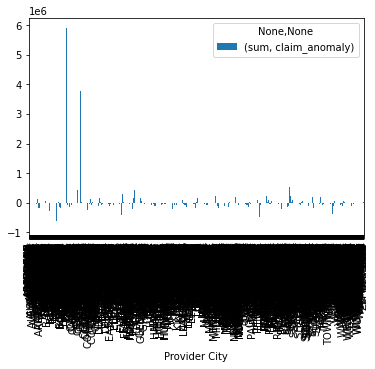

In [73]:
plt.figure(figsize =(20,10))
df_md_prov_chrg_reg1.plot(kind ='bar')
plt.show()

### Part 1C: Highest Number of procedures and largest differences between Claims and Reimbursements.

In [74]:
df_md_prov_chrg.loc[df_md_prov_chrg['avg_paid']==df_md_prov_chrg['avg_paid'].max()]

,procedure,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,patients_service_prov,avg_claims_prov,avg_reimbursement_prov,avg_paid,patients_service_sum,avg_claims_sum,avg_reimbursement_sum,claim_anomaly
49109,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,500051,OVERLAKE HOSPITAL MEDICAL CENTER,1035-116TH AVE NE,BELLEVUE,WA,98004,WA - Seattle,23,84499.26087,8500.608696,75998.652174,35760,12557.68079,10711.88118,71941.58008


In [75]:
df_md_prov_chrg.pivot_table(values=['procedure','avg_paid'], index=['Provider Name'], aggfunc={'procedure':'count','avg_paid':'max'})

,avg_paid,procedure
Provider Name,,
ABBEVILLE GENERAL HOSPITAL,1225.476784,25
ABBOTT NORTHWESTERN HOSPITAL,8603.249997,121
ABILENE REGIONAL MEDICAL CENTER,7219.586305,71
ABINGTON MEMORIAL HOSPITAL,5620.885882,121
ACMH HOSPITAL,1827.926299,54
...,...,...
YAVAPAI REGIONAL MEDICAL CENTER-EAST,2792.357143,34
YORK HOSPITAL,9415.235300,179
YUKON KUSKOKWIM DELTA REG HOSPITAL,1060.222226,6


### Part 2: Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions.

In [76]:
df_md_prov_chrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 206436
Data columns (total 16 columns):
procedure                                     206437 non-null object
Provider Id                                   206437 non-null int64
Provider Name                                 206437 non-null object
Provider Street Address                       206437 non-null object
Provider City                                 206437 non-null object
Provider State                                206437 non-null object
Provider Zip Code                             206437 non-null int64
Hospital Referral Region (HRR) Description    206437 non-null object
patients_service_prov                         206437 non-null int64
avg_claims_prov                               206437 non-null float64
avg_reimbursement_prov                        206437 non-null float64
avg_paid                                      206437 non-null float64
patients_service_sum                          206437 non-null

### Part2A: Providers least like others.

In [85]:
Q1 = df_md_prov_chrg.avg_claims_prov.quantile(0.25)
Q3 = df_md_prov_chrg.avg_claims_prov.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5892.761029000001


In [86]:
df_md_prov_chrg['claim_outlier']=np.where((df_md_prov_chrg.avg_claims_prov < (Q1 - 1.5 * IQR)) |(df_md_prov_chrg.avg_claims_prov > (Q3 + 1.5 * IQR)),1,0)

In [94]:
df_md_prov_chrg[['Provider Name','avg_claims_prov']][df_md_prov_chrg['claim_outlier'] == 1].sort_values(by ='avg_claims_prov',ascending = False).head(3)

,Provider Name,avg_claims_prov
39562,STANFORD HOSPITAL,156158.1818
150793,WESTCHESTER MEDICAL CENTER,140255.2667
109459,PINNACLE HOSPITAL,131187.3571


### Part 2B : Regions least like others.

In [93]:
df_md_prov_chrg[['Provider State','avg_claims_prov']][df_md_prov_chrg['claim_outlier'] == 1].sort_values(by ='avg_claims_prov',ascending = False).head(3)

,Provider State,avg_claims_prov
39562,CA,156158.1818
150793,NY,140255.2667
109459,IN,131187.3571


### Part 3 : Identify 10,000 Medicare patients who are involved in anomalous activities

In [97]:
### Since the patients level data are different from provider and procedure level data, it is difficult to merge the data and
### do descriptive analysis over it

In [95]:
df_pat_hist_rev

,id,age,gender,income
0,381693273,65-74,F,24000-31999
1,444060924,65-74,M,24000-31999
2,3641691,65-74,F,24000-31999
3,672653795,65-74,M,48000+
4,144916176,<65,F,48000+
...,...,...,...,...
4995,28831157,<65,M,24000-31999
4996,612539786,<65,F,24000-31999
4997,978751518,75-84,F,<16000
4998,105489783,75-84,M,24000-31999


In [96]:
df_trx_rev

,id,global_proc_id,count
0,65822,109,1
1,65822,125,1
2,119695,70,1
3,119695,124,1
4,119695,125,1
...,...,...,...
15036,999454987,112,1
15037,999460247,69,1
15038,999460247,92,1
15039,999460247,124,1
